In [1]:
from urllib import request
from bs4 import BeautifulSoup
from urllib.request import urlopen

# Zad
Zczytaj z wikipedi artykuły o tytułach 
```python
["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]
```
i zapisz w tablicy zawartości tych podstron ($id="bodyContent"$)

In [2]:
wiki = "http://en.wikipedia.org/wiki/"
titles = ["Integral", "Riemann_integral", "Riemann-Stieltjes_integral", "Derivative",
    "Limit_of_a_sequence", "Edvard_Munch", "Vincent_van_Gogh", "Jan_Matejko",
    "Lev_Tolstoj", "Franz_Kafka", "J._R._R._Tolkien"]



In [3]:
def parse(url):        
    x = urlopen(url).read()
    x = BeautifulSoup(x).find("div",id="bodyContent").find_all("p")
    return(x)

articles = [parse(url) for url in [wiki+x for x in titles]]
articles = [" ".join([str(paragraph) for paragraph in article]) for article in articles]

articles[0][:200]

C:\Users\admin\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\Users\admin\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


'<p>In <a href="/wiki/Mathematics" title="Mathematics">mathematics</a>, an <b>integral</b> assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that ar'

In [4]:
import re
articles = [re.sub("<.+?>"," ",a) for a in articles] # ew (str(a))

In [5]:
articles[0]

' In  mathematics , an  integral  assigns numbers to functions in a way that can describe displacement, area, volume, and other concepts that arise by combining  infinitesimal  data. Integration is one of the two main operations of  calculus , with its inverse operation,  differentiation , being the other. Given a  function   f  of a  real   variable   x  and an  interval   [ a ,  b ]  of the  real line , the  definite integral \n   is defined informally as the signed  area  of the region in the  xy -plane that is bounded by the  graph  of  f , the  x -axis and the vertical lines   x  =  a   and   x  =  b  . The area above the  x -axis adds to the total and that below the  x -axis subtracts from the total.\n   The operation of integration, up to an additive constant, is the inverse of the operation of differentiation. For this reason, the term  integral  may also refer to the related notion of the  antiderivative , a function  F  whose derivative is the given function  f . In this case

In [6]:
articles[1]

' In the branch of  mathematics  known as  real analysis , the  Riemann integral , created by  Bernhard Riemann , was the first rigorous definition of the  integral  of a  function  on an  interval .  It was presented to the faculty at the  University of Göttingen  in 1854, but not published in a journal until 1868.  [1]   For many functions and practical applications, the Riemann integral can be evaluated by the  fundamental theorem of calculus  or approximated by  numerical integration .\n   The Riemann integral is unsuitable for many theoretical purposes. Some of the technical deficiencies in Riemann integration can be remedied with the  Riemann–Stieltjes integral , and most disappear with the  Lebesgue integral .\n   Let  f  be a non-negative  real -valued function on the interval  [ a ,  b ] , and let\n   be the region of the plane under the graph of the function  f  and above the interval  [ a ,  b ]  (see the figure on the top right). We are interested in measuring the area of  

# Zad.

Proszę wykonać podstawową tekenizację biorąc pod uwagę:

 * bierzemy kolejne artykuły i dzieli go na tokeny
 * bierzemy listę tokenów i usuwamy punktory
 * bierzemy listę tokenów i usuwa liczby
 * bierzemy listę tokenów i zamieniamy na małe litery

a następnie stworzyć reprezentację **Tf-Idf**.

Użyj:

```python
from sklearn.feature_extraction.text import TfidfVectorizer
```

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list = list(string.punctuation) +  ["--", "\"", "``" , "...", "''", "'", "\\", '_' ]
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def stemming_tokenizer(words):
    words = sen2token(words)
    words = remove_punctuation(words)
    words = remove_nummbers(words)
    words = to_lower(words)
    
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

#preprocessor działa na całym dokumencie
def my_preprocessing(word):
    return word

tfidf_vectorizer = TfidfVectorizer(preprocessor = my_preprocessing, tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))

tfidf_vectorizer.fit(articles)
print( tfidf_vectorizer.vocabulary_ )
tfidf_matrix = tfidf_vectorizer.transform(articles)
print(tfidf_matrix.todense())

{'mathemat': 3700, 'integr': 3082, 'assign': 590, 'number': 4154, 'function': 2449, 'way': 6372, 'describ': 1650, 'displac': 1752, 'area': 536, 'volum': 6309, 'concept': 1327, 'aris': 540, 'combin': 1269, 'infinitesim': 3021, 'data': 1545, 'one': 4212, 'two': 6053, 'main': 3621, 'oper': 4223, 'calculu': 1041, 'invers': 3118, 'differenti': 1698, 'given': 2551, 'f': 2197, 'real': 4818, 'variabl': 6216, 'x': 6526, 'interv': 3100, 'b': 670, 'line': 3506, 'definit': 1593, 'defin': 1592, 'inform': 3026, 'sign': 5371, 'region': 4888, 'xy': 6540, '-plane': 40, 'bound': 915, 'graph': 2610, '-axi': 32, 'vertic': 6253, 'abov': 243, 'add': 293, 'total': 5962, 'subtract': 5685, 'addit': 294, 'constant': 1366, 'thi': 5881, 'reason': 4830, 'term': 5845, 'may': 3719, 'also': 387, 'refer': 4874, 'relat': 4905, 'notion': 4137, 'antideriv': 479, 'whose': 6428, 'deriv': 1647, 'case': 1092, 'call': 1044, 'indefinit': 2989, 'written': 6518, 'discuss': 1735, 'articl': 566, 'fundament': 2450, 'theorem': 5872,

[[0.         0.         0.00450526 ... 0.         0.         0.00450526]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


# Zad 
Ograniczmy się do 2 pierszych komponentów i narysujmy na płaszczyźnie nasze **artykuły**.

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
svd.fit(tfidf_matrix)

docs_red = svd.transform(tfidf_matrix) 

docs_red # przeanalizujemy podobienstwo

array([[ 0.85181646, -0.10348138],
       [ 0.80929835, -0.11413332],
       [ 0.77113095, -0.12237882],
       [ 0.63432295, -0.07160177],
       [ 0.47898465, -0.05839009],
       [ 0.10832256,  0.56173731],
       [ 0.11119051,  0.611948  ],
       [ 0.1055447 ,  0.61321014],
       [ 0.09757687,  0.50509045],
       [ 0.09972214,  0.49455878],
       [ 0.11074466,  0.50616828]])

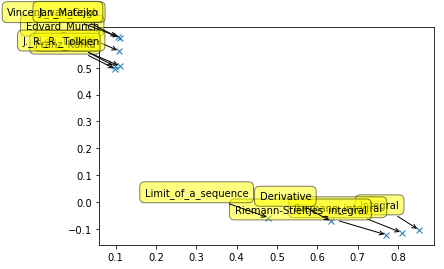

In [11]:
import matplotlib.pyplot as plt


plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

# Zad 
W zredukowanej przestrzeni proszę zaznaczyć

```python
query = ["Machine Learning", "Mathematics is art"]
query_red = svd.transform( vectorizer.transform(query).todense() ) 
print(query_red)
```

In [12]:
query = ["Machine Learning", "Mathematics is art"]
query_red = svd.transform( tfidf_vectorizer.transform(query).todense() ) 
print(query_red)

[[0.00143756 0.01014408]
 [0.01913787 0.05652992]]


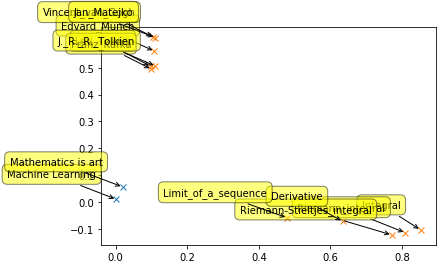

In [13]:
plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = titles
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = query
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()